#  Laboratorio #3: Correcciones de Histograma y Filtrado Espacial en Frecuencia

 ## 2. Visualización y Normalización de Histogramas
 1. Utilizar la función cargar_imagen_gris_np(x)para  cargar laimagen belka-strelka_Lab03_01.png en formato de arreglo de numpy en escala de grises.

In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
def cargar_imagen_gris_np(x):
    import numpy as np
    from PIL import Image
    imaganen_color=Image.open(rf'{x}')
    imagen_gris= imaganen_color.convert('L')
    imagen_gris=np.array(imagen_gris)/256
    return imagen_gris

In [85]:
belka_strelka01_gris=cargar_imagen_gris_np('C:/Users/EZEQUIEL/OneDrive - Universidad Tecnológica de Panamá/vs code/vision artificial/2024_02_1152_Lab03_Jaramillo/belka-strelka_Lab03_01.png')
print(belka_strelka01_gris.shape)

(583, 783)


 3. Visualizar el histograma de la imagen normalizada utilizando la función plt.hist() de Matplotlib, asegurándose de
 configurar adecuadamente los parámetros para representar la intensidad de los píxeles.

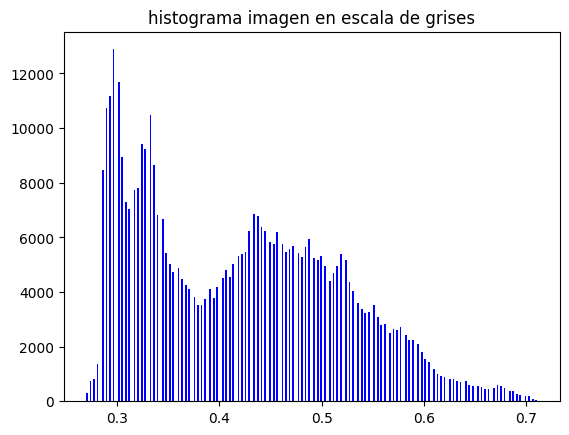

In [86]:

plt.hist(belka_strelka01_gris.ravel(),bins=256, color='blue')
plt.title('histograma imagen en escala de grises')
plt.show()



4. Escribir una nueva función estirar_histograma(x) que estire el histograma de laimagen.Estafunción debeajustar
 la distribución de los niveles de intensidad de la imagen para que el histograma resultante esté distribuido entre todo el
 rango de intensidades entre 0 y 1.
 Recordar que la expresión para estiramiento de histograma es la siguiente, aplicada a cada pixel de la imagen:
 
 $T(x) = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}$

 Recuerde que puede utilizar las funciones np.min(x) y np.max(x) para encontrar los valores mínimo y máximo como
 se hizo enelLaboratorio #2. Graficar, una al lado de la otra, las imágenes antes y después de haber sido sometidas al proceso
 de estiramiento.

In [87]:
def estirar_histograma(x):
    x_estirado = (x - np.min(x)) / (np.max(x) - np.min(x))
    return x_estirado

In [88]:
im_estirado=estirar_histograma(belka_strelka01_gris)


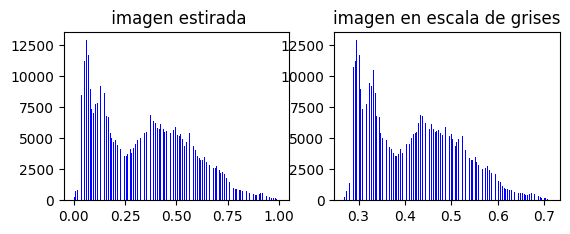

In [89]:

plt.subplot(221)
plt.hist(im_estirado.ravel(),bins=256,color='blue')
plt.title(' imagen estirada')

plt.subplot(222)
plt.hist(belka_strelka01_gris.ravel(),bins=256, color='blue')
plt.title('imagen en escala de grises')

plt.show()


5. Graficar, una al lado de la otra, la imagen original y la imagen con el histograma estirado. Discutir las diferencias observadas
 y explicar por qué ocurren estas diferencias.


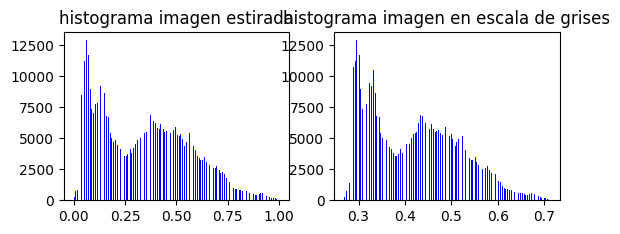

In [90]:
plt.subplot(221)
plt.hist(im_estirado.ravel(),bins=256,color='blue')
plt.title('histograma imagen estirada')

plt.subplot(222)
plt.hist(belka_strelka01_gris.ravel(),bins=256, color='blue')
plt.title('histograma imagen en escala de grises')

plt.show()

Para este caso se puede apreciar como la imagen paso a ocupar todo el rando correspondiente a 1 y 0, es decir se puede apreciar el estiramiento que la imagen normalizada acaba de tener 

## 3. Visualización y Procesamiento de Imágenes en el Dominio de la Frecuencia
 1. Cargar la imagen belka-strelka_Lab03_02.png utilizando las funciones cargar_imagen_gris_np(x) y
 normalizar_imagen().


(583, 783)


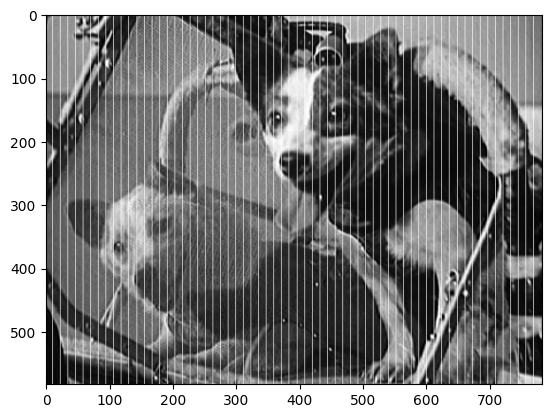

In [91]:
belka_strelka02_gris=cargar_imagen_gris_np('C:/Users/EZEQUIEL/OneDrive - Universidad Tecnológica de Panamá/vs code/vision artificial/2024_02_1152_Lab03_Jaramillo/belka-strelka_Lab03_02.png')
print(belka_strelka02_gris.shape)

plt.imshow(belka_strelka02_gris, cmap='gray')
plt.show()

2. Implementar una función espectro_imagen(x) que calcule la Transformada de Fourier de dos dimensiones de la
 imagen, utilizando la función np.fft.fft2() de Numpy. Asegurarse de centrar las frecuencias utilizando la función
 np.fft.fftshift().


In [92]:
def espectro_imagen(x):
    imagen_por_furier=np.fft.fft2(x)
    imagen_con_fourier=np.fft.fftshift(imagen_por_furier)
    return imagen_con_fourier

3. Mostrar el espectro de Fourier de la imagen y señalar características notables, especialmente los efectos de las líneas
 verticales blancas en la transformada.

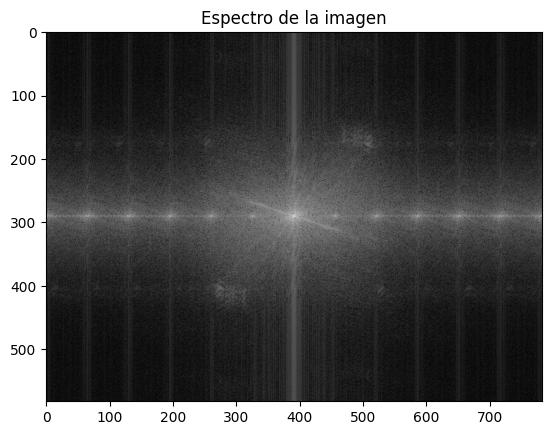

In [93]:
imagen_fourier=espectro_imagen(belka_strelka02_gris)
espectro = np.abs(imagen_fourier)
plt.imshow(np.log(1 + espectro), cmap='gray')
plt.title("Espectro de la imagen")
plt.show()

* En la imagen se aprecia como las lineas blancas terminaron representados como picos a lo largo de la franja horizontal media de la transformada de fourier 
* tambien se ve como el efecto de la funcion shift hace que las franjas de menor frecuencia se concentren en el centro de la imagen y que las de alta frecuencia se alejen cada vez mas.

4. Crear una máscara binaria para filtrar el ruido identificado en el espectro de Fourier. La máscara debe ser diseñada en un
 editor de imágenes de su preferencia, tales como Paint (Windows 11), Gimp, Photoshop, https://www.photopea.com/, o
 similar.

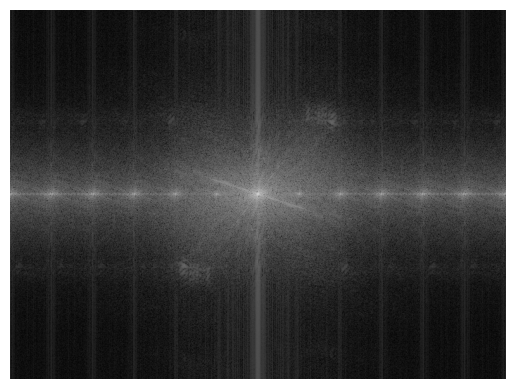

In [94]:
espctro_fourier=np.log(1 + espectro)
plt.imshow(espctro_fourier,cmap='gray')
plt.axis('off')
plt.savefig('vision artificial', dpi=100)
plt.show()

 5. Escribir una nueva función cargar_mascara_binaria(ubicación) que cargue, normalice y binarice (asigne a los
 pixeles de la máscara únicamente valores 0 ó 1) la máscara creada.

In [95]:
def cargar_mascara_binaria(x):
    import numpy as np
    from PIL import Image
    imagen= Image.open(rf'{x}')
    imagen=imagen.convert('L')
    imagen=imagen.resize((783,583))
    mascara=np.array(imagen)/255
    mascara_binaria=(mascara>0.5).astype(float)
    return mascara_binaria


6. Cargar la máscara creada utiliando la función cargar_mascara_binaria(ubicación) y graficarla junto a su his
tograma. Verificar que el histograma indique que la imagen de máscara contenga exclusivamente valores de 0 y 1.

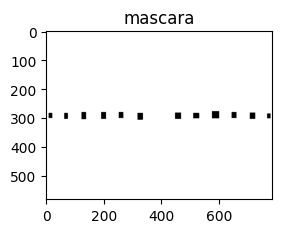

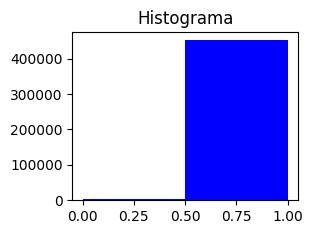

In [96]:
mascara_cargada=cargar_mascara_binaria('C:/Users/EZEQUIEL/OneDrive - Universidad Tecnológica de Panamá/vs code/vision artificial/2024_02_1152_Lab03_Jaramillo/mascara binaria.png')
plt.subplot(221)
plt.imshow(mascara_cargada, cmap='gray')
plt.title('mascara')
plt.show()

plt.subplot(222)
plt.hist(mascara_cargada.ravel(),bins=2,color='blue')
plt.title('Histograma')

plt.show()

7. Aplicar la máscara al espectro de Fourier utilizando operaciones de multiplicación de matrices. Graficar el  espectro de la imagen antes y después de ser filtrada utilizando la máscara.

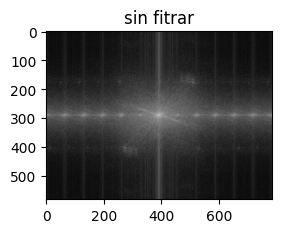

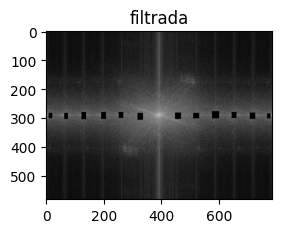

In [97]:
imagen_filtrada=imagen_fourier*mascara_cargada
graf=np.abs(imagen_filtrada)
plt.subplot(2,2,1)
plt.imshow(np.log(1 + espectro), cmap='gray')
plt.title("sin fitrar")
plt.show()

plt.subplot(2,2,2)
plt.imshow(np.log(1 + graf), cmap='gray')
plt.title('filtrada')
plt.show()




 8. Graficar, una al lado de la otra, la imagen original en escala de grises, y la transformada de Fourier inversa del espectro
 filtrado del paso anterior para obtener la imagen filtrada.

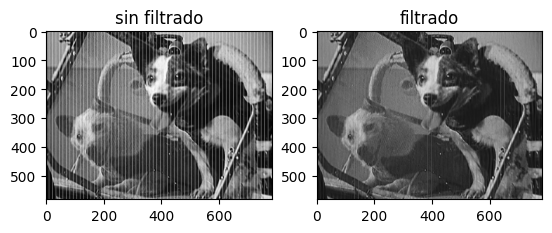

In [98]:
imagen_recuperada = np.fft.ifft2(np.fft.ifftshift(imagen_filtrada))
imagen_absoluta=np.abs(imagen_recuperada)
imagen_ab_normalizada=(imagen_absoluta - np.min(imagen_absoluta))/(np.max(imagen_absoluta) - np.min(imagen_absoluta))
pueba=imagen_ab_normalizada
plt.subplot(2,2,1)
plt.imshow(belka_strelka02_gris, cmap='gray')
plt.title('sin filtrado')

plt.subplot(2,2,2)
plt.imshow(pueba, cmap='gray')
plt.title('filtrado')
plt.show()

 9. Comparar visualmente la imagen original y la imagen filtrada y coi los efectos de la operación de filtrado.

* Después del filtrado se puede apreciar como las líneas en la imagen de la derecha han sido atenuadas casi en su totalidad dejando una imagen visualmente mas calara y fácil de entender.

##  4. Creación y Filtrado de Patrones de Líneas

1. Desarrollar una función lineas_horizontales(img, ancho_linea, espacio_lineas, tono)quegene
re un patrón de líneas horizontales sobre una imagen dada. Las líneas añadidas a la imagen deben tener un ancho de
 ancho_linea, deben estar separadas por espacio_lineas píxeles, y deben tener un nivel de intensidad dado por
 tono.

In [99]:
def lineas_horizontales(img, ancho_linea, espacio_lineas, tono):
    img_copia=img.copy()  
    alto, ancho = img_copia.shape[:2]
    for i in range(0, alto, espacio_lineas + ancho_linea):
        img_copia[i:i+ancho_linea, :] = tono
    return img_copia

 2. Cargar la imagen belka-strelka.png(normalizada y en escala de grises) y aplicar la función lineas_horizontales()
 conlíneas blancas de 2 píxeles de ancho y espaciadas cada 10 píxeles. Graficar,una al lado de la otra,la imagen cargada
 y la misma imagen luego de habérsele aplicado la función lineas_horizontales() con los parámetros indicados.

In [100]:
belka_strelka_gris= cargar_imagen_gris_np('C:/Users/EZEQUIEL/OneDrive - Universidad Tecnológica de Panamá/vs code/vision artificial/2024_02_1152_Lab03_Jaramillo/belka-strelka.png')
belka_strelka_nom=estirar_histograma(belka_strelka_gris)

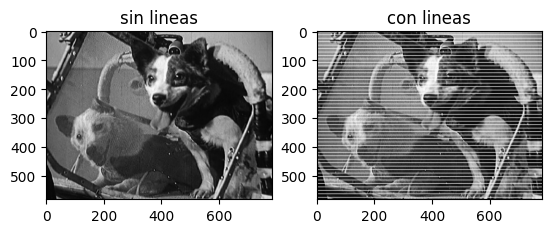

In [101]:
belka_strelka_alterada=lineas_horizontales(belka_strelka_nom,2,10,1)

plt.subplot(221)
plt.imshow(belka_strelka_nom,cmap='gray')
plt.title('sin lineas')

plt.subplot(222)
plt.imshow(belka_strelka_alterada,cmap='gray')
plt.title('con lineas')
plt.show()

3. Desarrollar una función lineas_verticales(img, ancho_linea, espacio_lineas, tono) que funcione
 de manera similar a lineas_horizontales(), pero generando líneas verticales. Aplicar esta función a la misma
 imagen con líneas negras de 4píxeles de ancho y espaciadas cada 8 píxeles. Graficar, una al lado de la otra,la imagen cargada
 y la misma imagen luego de habérsele aplicado la función lineas_verticales() con los parámetros indicados.

In [102]:
def lineas_verticales(img, ancho_linea, espacio_lineas, tono):
    img_copia_vertical=img.copy()  
    alto, ancho = img_copia_vertical.shape[:2]
    for i in range(0, ancho, espacio_lineas + ancho_linea):
        img_copia_vertical[ : ,i:i+ancho_linea] = tono
    return img_copia_vertical

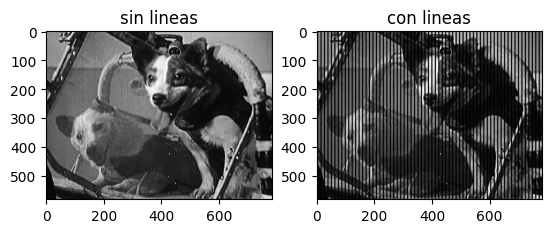

In [103]:
belka_strelka_alterada=lineas_verticales(belka_strelka_nom,4,8,0)

plt.subplot(221)
plt.imshow(belka_strelka_nom,cmap='gray')
plt.title('sin lineas')

plt.subplot(222)
plt.imshow(belka_strelka_alterada,cmap='gray')
plt.title('con lineas')
plt.show()

4. Combinar líneas horizontales y verticales en la misma imagen utilizando líneas blancas de 2 píxeles de ancho y espaciadas
 cada 5 píxeles. Graficar el resultado y su Transformada de Fourier 2D, comentando los efectos de las líneas añadidas en el
 espectro de la imagen al compararse con el espectro de la imagen original sin líneas añadidas.

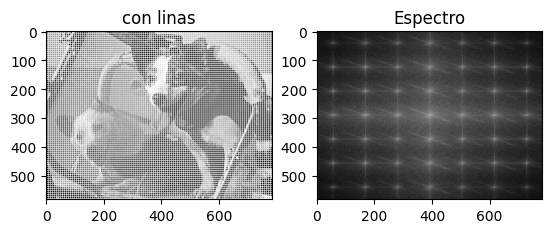

In [104]:
imagen_doble1=lineas_horizontales(belka_strelka_nom,2,5,1)
imagen_doble2=lineas_verticales(imagen_doble1,2,5,1)

imagen_doble_espectro=espectro_imagen(imagen_doble2)
espectro_doble = np.abs(imagen_doble_espectro)

plt.subplot(221)
plt.imshow(imagen_doble2,cmap='gray')
plt.title('con linas')
plt.subplot(222)
plt.imshow(np.log(1 + espectro_doble), cmap='gray')
plt.title("Espectro")
plt.show()

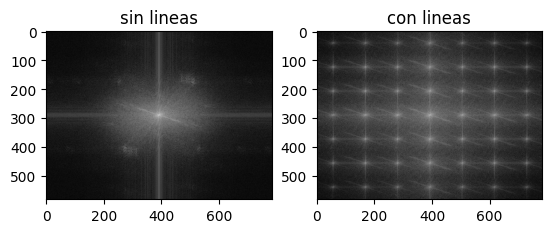

In [105]:
imagen_norm_espectro=espectro_imagen(belka_strelka_nom)
espectro_norm = np.abs(imagen_norm_espectro)

plt.subplot(221)
plt.imshow(np.log(1 + espectro_norm), cmap='gray')
plt.title("sin lineas")

plt.subplot(222)
plt.imshow(np.log(1 + espectro_doble), cmap='gray')
plt.title("con lineas")
plt.show()

* al comparar ambos espectros se puede apreciar como se formar picos en los espacios que corresponden a las intersecciones de linea en el espectro de la imagen con lineas, mientras que la imagen normal se ve con un espectro bastante limpio 

 5. Crear una máscara para filtrar el ruido específico introducido por las líneas, aplicar esta máscara a la Transformada de
 Fourier de la imagen con líneas, realizar la transformada inversa, y graficar la imagen resultante al lado de la imagen
 original. Discutir los efectos del filtrado sobre la calidad de la imagen.

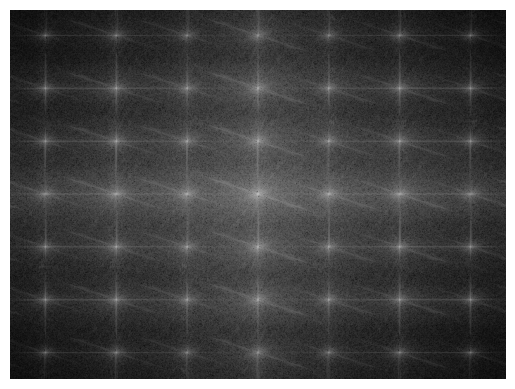

In [106]:
espctro_imagen_doble=np.log(1 + espectro_doble)
plt.imshow(espctro_imagen_doble,cmap='gray')
plt.axis('off')
plt.savefig('espectro imagenes con doble linea', dpi=100)
plt.show()

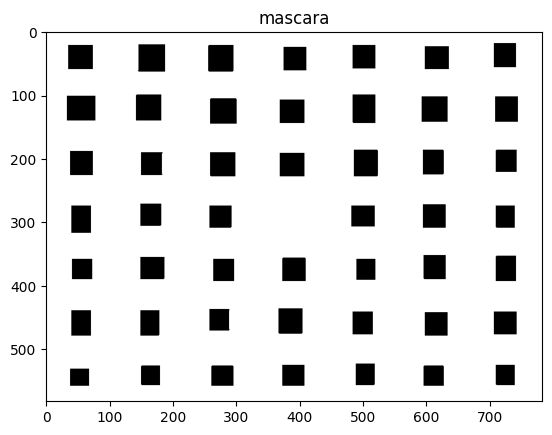

In [107]:
mascara_cargada_doble=cargar_mascara_binaria('C:/Users/EZEQUIEL/OneDrive - Universidad Tecnológica de Panamá/vs code/vision artificial/2024_02_1152_Lab03_Jaramillo/mascara imagen doble linea.png')
plt.imshow(mascara_cargada_doble, cmap='gray')
plt.title('mascara')
plt.show()

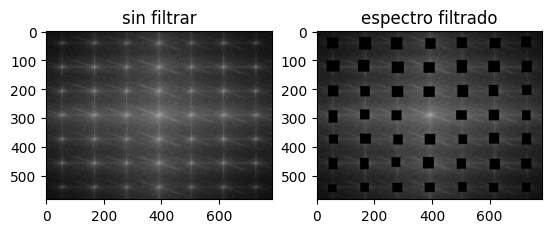

In [108]:
imagen_doble_filtrada= imagen_doble_espectro*mascara_cargada_doble
espectro_imagendob_fil = np.abs(imagen_doble_filtrada)

plt.subplot(221)
plt.imshow(np.log(1 + espectro_doble), cmap='gray')
plt.title("sin filtrar")

plt.subplot(222)
plt.imshow(np.log(1 + espectro_imagendob_fil), cmap='gray')
plt.title("espectro filtrado")
plt.show()

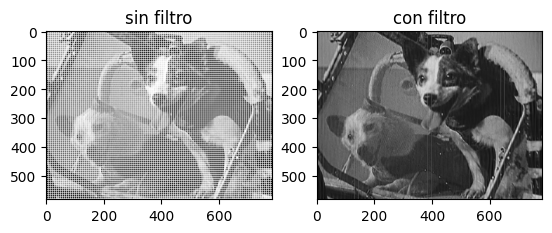

In [109]:
imagen_doble_recuperada = np.fft.ifft2(np.fft.ifftshift(imagen_doble_espectro))
imagen_doble_resultante=np.abs(imagen_doble_recuperada)
imagen_doble_normalizada=(imagen_absoluta - np.min(imagen_doble_resultante))/(np.max(imagen_doble_resultante) - np.min(imagen_doble_resultante))
pueba1=imagen_doble_normalizada


plt.subplot(221)
plt.imshow(imagen_doble2,cmap='gray')
plt.title('sin filtro')
plt.subplot(222)
plt.imshow(pueba1,cmap='gray')
plt.title('con filtro')
plt.show()

 6. Generar dos nuevas imágenes con líneas verticales: una con líneas blancas de 2 píxeles de ancho y separadas cada 6 píxeles, y
 otra con líneas de intensidad 0.5, de 2 píxeles de ancho y separadas cada 6 píxeles.Graficar ambas imágenes y sus respectivas
 Transformadas de Fourier 2D, comentando el efecto de la intensidad de las líneas en el espectro de la imagen.

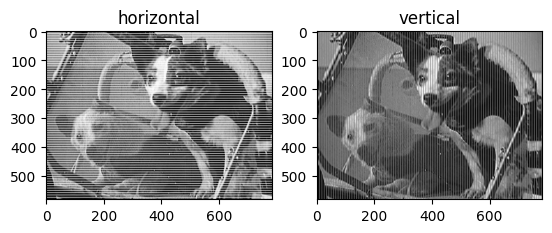

In [110]:
img_horizontal=lineas_horizontales(belka_strelka_nom,2,6,1)

img_vertical=lineas_verticales(belka_strelka_nom,2,6,0.5)

plt.subplot(221)
plt.imshow(img_horizontal,cmap='gray')
plt.title('horizontal')
plt.subplot(222)
plt.imshow(img_vertical,cmap='gray')
plt.title('vertical')
plt.show()

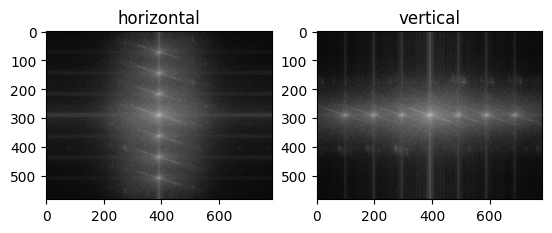

In [111]:
esp_horizontal=espectro_imagen(img_horizontal)

esp_vertical=espectro_imagen(img_vertical)

horizontal = np.abs(esp_horizontal)
vertical = np.abs(esp_vertical)

plt.subplot(221)
plt.imshow(np.log(1 + horizontal), cmap='gray')
plt.title("horizontal")

plt.subplot(222)
plt.imshow(np.log(1 + vertical), cmap='gray')
plt.title("vertical")

plt.show()

* en la imagen horizontal se pueden los picos de ruido con mayor intensidad que en la imagn vertical, intuyo que esto se debe a la intenisad del tono de las franjas generadas, ya que se puede ver que en la imagen vertical hay mas informacion diferenciable que puede corresponder a la imagen, haciendo mas sencillo el proceso de filtrado